# Assignment 8: Multidimensional Scaling with Vector Representations

Make sure that you have read the required readings for this homework:
 

* [Sebastian Ruder, On word embeddings – part 1: [word2vec]](https://ruder.io/word-embeddings-1/)
* [Christopher Manning, Richard Socher – Glove](https://gatech.instructure.com/files/55649635/download?download_frd=1)

or 

* [Jay Alammar, The Illustrated Word2Vec](https://jalammar.github.io/illustrated-word2vec/)


In this assignment, we are going to conduct an analysis of word
embeddings from GloVe by comparing the distances and relationships
between the various embeddings with data from human subjects. This
homework will build on the content taught in lecture, so please review
the slides for this lecture before starting this assignment.

Multidimentional scaling typically requires a distance matrix as
input, and allows the user to fix the number of dimensions to reduce
the data to while still trying to maintain the pairwise distances
between the observations.

In our case, our data from humans came in the form of a distance
matrix, as participants were shown pairs of words in various
categories and were asked to rate how similar all pairs of words in a
category were to each other.

## Loading the data

To make it easier for you, we've included the human data directly in
the code. Please make sure you understand how the words correspond to
the numbers in the matrices.

For example, take the anger category. The words for the *Anger* category
are "calm", "annoyed", "angry", and "furious". The distance matrix
then is a 4x4 matrix, with each cell representing the distance between
the two words. Both the rows and columns correspond to the words in
order, i.e., element 2, 3 corresponds to the distance between
"annoyed" and "angry" and element 4, 1 corresponds to the distance
between "furious" and "calm". Note that the distance between a word
and itself is zero, and the distance between word *x* and word *y* is the
same as the distance between word *y* and word *x*, resulting in a
symmetric matrix with a zero diagonal.

Now we're ready to start coding. Let's import the libraries first.


In [4]:
from sklearn.manifold import MDS
import numpy as np
from scipy.spatial.distance import cosine
from matplotlib import pyplot as plt

Now let's load the data! Here's the human data from Varma et al. (2022). People estimated the similarity between all the unique pairs of words for all 5 categories. We converted the similarity ratings into distance matrices for you.


In [5]:
human_distance_matrix_by_category = {
  'anger': np.array(
      [[0.  , 0.74, 0.81, 0.83],
       [0.74, 0.  , 0.39, 0.45],
       [0.81, 0.39, 0.  , 0.2 ],
       [0.83, 0.45, 0.2 , 0.  ]]),
 'danger': np.array(
     [[0.  , 0.8 , 0.84, 0.87],
      [0.8 , 0.  , 0.34, 0.48],
      [0.84, 0.34, 0.  , 0.25],
      [0.87, 0.48, 0.25, 0.  ]]),
 'greatness': np.array(
     [[0.  , 0.38, 0.49, 0.52],
      [0.38, 0.  , 0.3 , 0.35],
      [0.49, 0.3 , 0.  , 0.24],
      [0.52, 0.35, 0.24, 0.  ]]),
 'probability': np.array(
     [[0.  , 0.66, 0.72, 0.78],
      [0.66, 0.  , 0.36, 0.48],
      [0.72, 0.36, 0.  , 0.43],
      [0.78, 0.48, 0.43, 0.  ]]),
 'quantity': np.array(
     [[0.  , 0.72, 0.85, 0.83],
      [0.72, 0.  , 0.57, 0.62],
      [0.85, 0.57, 0.  , 0.28],
      [0.83, 0.62, 0.28, 0.  ]])}

Let's enumerate the words and their categories to use when running MDS and
visualizing its results.


In [6]:
words_by_category = {
    "anger": """calm
annoyed
angry
furious""".split(),
    "danger": """safe
sketchy
dangerous
deadly""".split(),
    "greatness" : """fair
good
great
best""".split(),
    "probability": """rare
possible
probable
certain""".split(),
    "quantity": """none
some
most
all""".split()
}

words_of_interest = set()

for words in words_by_category.values():
    words_of_interest.update(words)

Now, let's load the word vectors from GloVe (Pennington et al., 2014). We're
going to use the pretrained vectors the authors provide on their
[website](https://nlp.stanford.edu/projects/glove/). Download a `.zip`
file of any model from their webpage and extract a text file containing the
vectors from it.


In [7]:
word_vectors = {}
with open("files/glove/glove.6B.300d.txt", encoding='utf-8') as f:
    for line in f:
        word, rest = line.split(" ", 1)
        if word in words_of_interest:
            word_vectors[word] = np.array(rest.split()).astype("float")

Now use the word embeddings from GloVe to obtain a distance matrix of the word in each category.

In [8]:
from scipy.spatial.distance import cosine

glove_distance_matrix_by_category = {}

for category, word in words_by_category.items():
    num_words = len(word)
    distance_matrix = np.zeros((num_words, num_words))

    for i in range(num_words):
        for j in range(i + 1, num_words):
            distance = cosine(word_vectors[word[i]], word_vectors[word[j]])
            distance_matrix[i, j] = distance_matrix[j, i] = distance
    
    glove_distance_matrix_by_category[category] = distance_matrix

Great! Now let's run MDS on the distance matrices and visualize the results.


Complete the `handle_mds()` function. It should use MDS to convert the
distance matrix to a 1-dimensional vector and then graph the
results. Refer to the [scikit-learn documentation on
MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html)
for usage instructions. We have already imported the `MDS` class. You'll want the `dissimilarity` keyword
argument to be `"precomputed"` and `n_components` to be `1`. After
fitting, the `model.embedding_` attribute will contain the positions
of the words in space. `model.stress_` contains the stress value of
the model fit. Use the embedding to graph the words using
`matplotlib`. The function `plt.scatter` will be useful here. Label
the words and the graphs with the model, category, and stress so that
you can analyze them later.

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


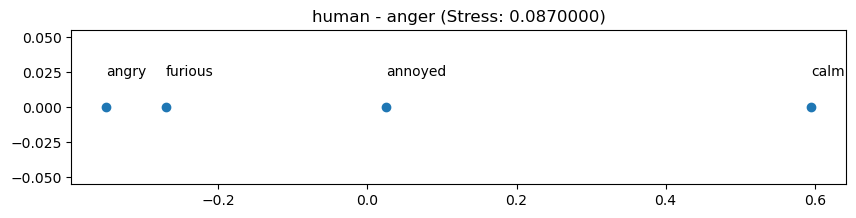

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


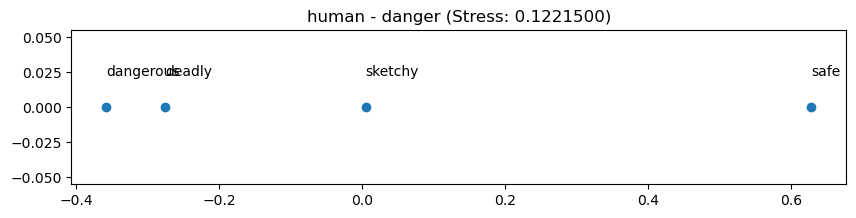

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


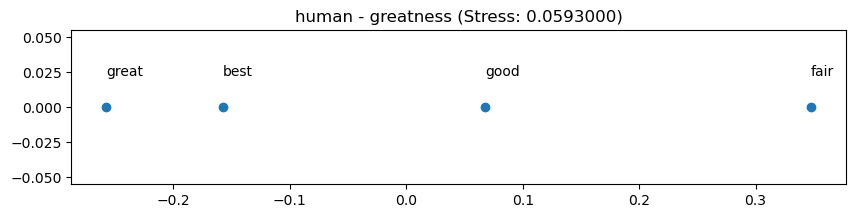

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


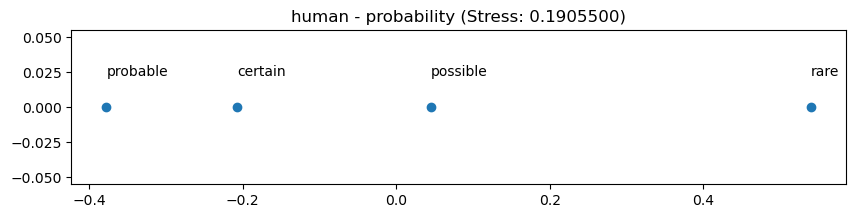

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


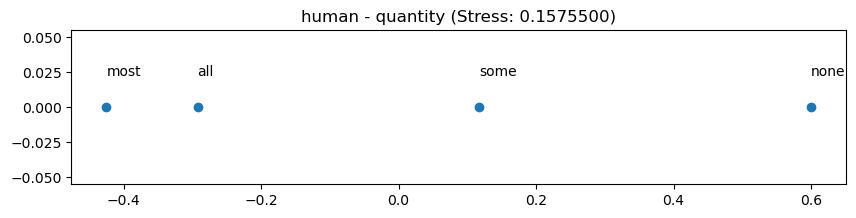

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


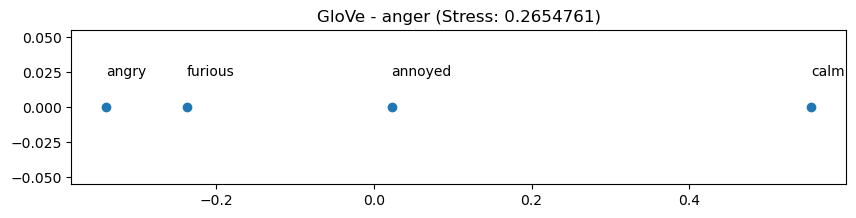

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


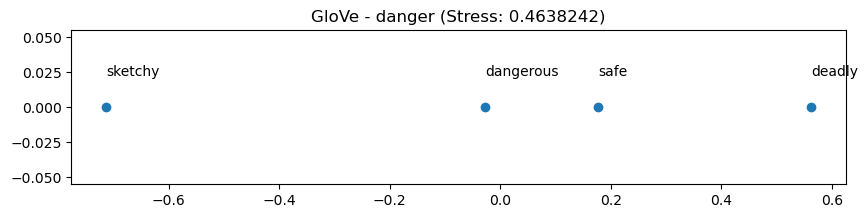

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


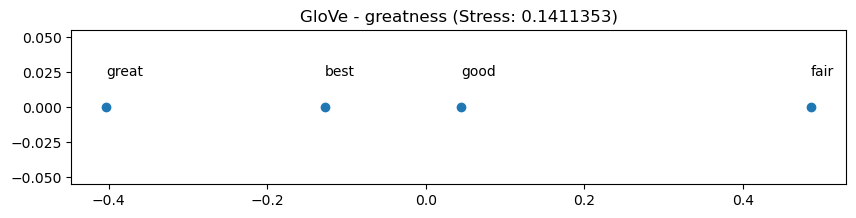

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


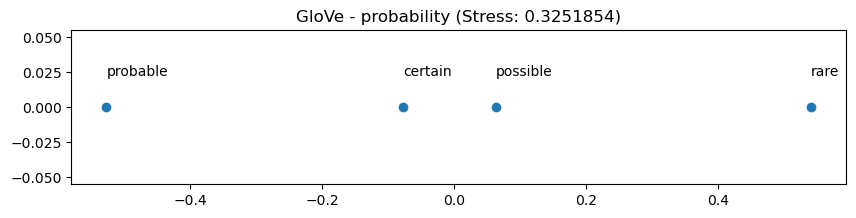

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


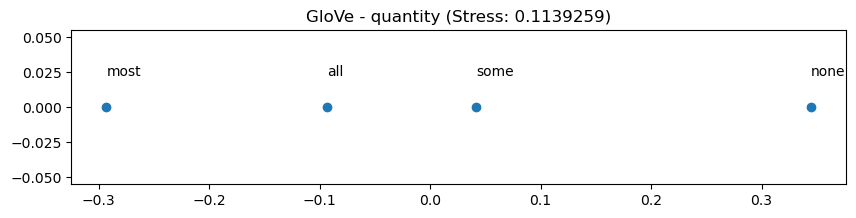

In [ ]:
def handle_mds(M, words, category, label):
    mds = MDS(n_components=1, dissimilarity="precomputed", random_state=32)
    embedding = mds.fit_transform(M)
    stress = mds.stress_
    
    plt.figure(figsize=(10, 2))
    plt.scatter(embedding, [0] * len(embedding), marker='o')
    
    for i, word in enumerate(words):
        plt.text(embedding[i], 0.02, word, ha='left', va='bottom')
    
    plt.title(f"{label} - {category} (Stress: {stress:.7f})")
    plt.show()

def handle_dict(d, label):
    for category, M in d.items():
        handle_mds(M, words_by_category[category], category, label)

# example running it on the human distance matrices
handle_dict(human_distance_matrix_by_category, "human")
handle_dict(glove_distance_matrix_by_category, "GloVe")

You should now being seeing some figures that look like this:

![](static/example-mds-output.png)


Great! It's now analysis time. You may want to view the MDS embeddings
directly by printing them for the analysis. Time to answer some questions.

## Questions

* Submit a visualization of your MDS embeddings for both the human and GloVe data. There should be 10 images, 5 for the human ratings and 5 for the GloVe word embeddings.
  * All the 10 images, 5 for human ratings and 5 for GloVe word embeddings can be found above.
* Comment on the MDS solutions generated from the human data. Does the ordinal arrangement of the adjectives in each set make sense, i.e., are they correctly ordered from "least" to "most"? (Or from "most" to "least" -- MDS is agnostic on left-right ordering in the solutions it generates.) Do the distances between the words follow the functional form you were expecting? Describe the patterns and provide hypotheses that might explain them.
  * From the human data, we can see there are some patterns to note, like in the "anger" section, the distance between words similar to "anger" like "furious" and "annoyed" is less than it is between words like "anger" and "calm". Similarly for "danger", distance between "danger" and "safe" is the biggest and "danger" and "deadly" is small. On the other hand, words like "certain" and "probable" should be kinda far from each other which they are, but "probable" and "possible" should be nearby which is not the case. "most" and "none" seem like opposites so the distance between them if the most and "most" and "all" seem like more similar so the distance between them is smaller comparatively. The distances between the function form mostly follows the form that i was expecting but in the case of "probability", "rare" seems like the opposite so that is fine. The concern is why is "certain" closer to "probable" than "possible" maybe because maybe as in natural language, "certain" and "probable" often appear in similar contexts, such as in discussions about outcomes with a positive expectation like "it is certain or probable to happen" wheras "Possible" is a looser word which may appear in a wider range of contexts, which could lead to a larger distance from "certain" in embedding spaces.
* Consider the same questions as in (2) for GloVe's MDS solutions.
  * The GloVe's MDS solution for all the 5 words is very interesting, it seems like a little unexpected in some cases like the "probable" case from human data question, i see in GloVe, distance between "probable" and "certain" is more than the distance between "certain" and "possible" is. Which is not intuitive at all, certain does not sound similar to possible. The chart for "great" is well great, the distance between great, best, and good are almost equal but "fair" is somewhere in the corner which suggests a great divison. This still does not compare to human data where "great" and "best" are the nearest and "good" is a good amount amount and "fair" is even further. Quantity part is similar to humans and Anger part is also similar with a lower stress value. The most surprising so far has been "danger", the distance between "sketchy" and "dangerous" is more than distance between "sketchy" and "deadly". The distance between "danger" and "safe" is surprisingly small maybe because they are direct antonyms and the word pairing has appeared in natural language text more often than the word pair "sketchy" and "dangerous". Like in these sentences we can see that effect, "In times of danger, resort to safety" or "It is a sketchy neighborhood".
* Now compare the MDS solutions for the human participants and for
  GloVe. What differences do you notice? What does the model capture of human's word representations, and what does it miss? Provide hypotheses for why it succeeds and why it fails.
  * As mentioned in the previous answers, Anger, greatness, quantity are the embeddings that the GloVe models provides similar outputs to humans because concepts that are relatively concrete like "quantity" or have well-defined positive or negative associations like "anger" tend to form distinct clusters in embedding space. This makes them easier for the model - GloVe to model in a way that aligns with human judgment. On the other hand, for probability and danger, we see the human data captures a more accurate representations and the GloVe model seems to be confused that may be because the terms are a little abstract like "probability" and more context dependent. GloVe does not consider sentence-level context in embeddings, so it may fail to differentiate between these context-specific uses.Probably, this can result in "probability" or "danger" terms clustering in ways that don’t align with human intuition. 
* What is the **stress** statistic that is outputted for each MDS
  solution? What does this statistic represent? What are "acceptable" ranges for it, and what values suggest that more dimensions may be needed to adequately capture the distances/similarities?
  * The stress value of mds represents how well the model handles being reduced from one dimension to another, it can be considered as a "distortion" value. Lower stress value as one might anticipate meaning the MDS projection accurately represents the original distances. High stress values suggest that the transformation to a lower dimension is not exactly an accurate representation of the embedding. Values below 0.1 are considered good, greater than 0.2 or 0.3 is where we see the significant distortion and we say that the model fit is poor.

* **Choose and complete ONE of the following**:

  1. Investigate the dimensionality of the solution. This homework
     enforced a one-dimensional solution to match the nature of number
     lines. Try to generate two-dimensional solutions for all 5 sets
     of human ratings and GloVe word embeddings. Is the extra
     dimension informative? If so, try to interpret what the dimension
     could mean.

  2. Fit a linear function to each of the 1-dimensional solutions (5
     for the human ratings and 5 for the GloVe word embeddings). How
     linear are human and GloVe representations? Compare them to each
     other.
     
  3. Compare the output from Glove models of differing sizes. Do
     larger models do a better job of getting the word order right?
     Are they more similar to humans?

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


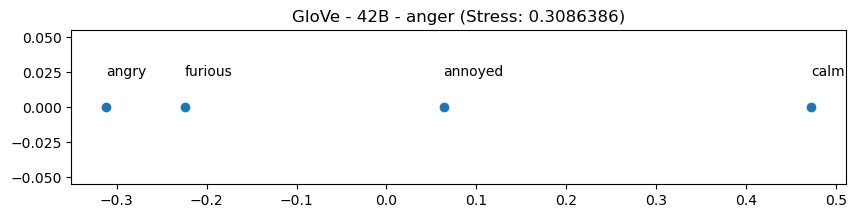

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


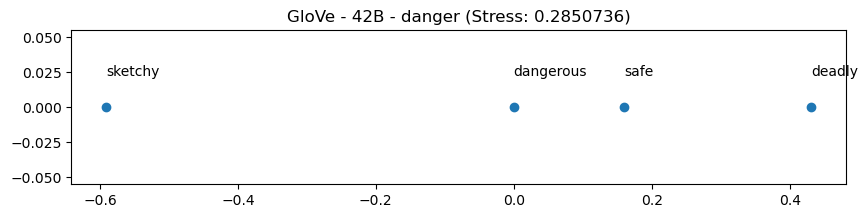

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


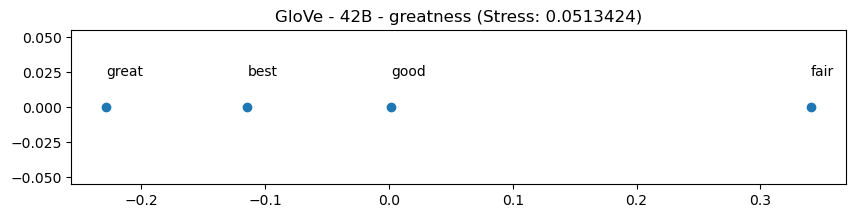

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


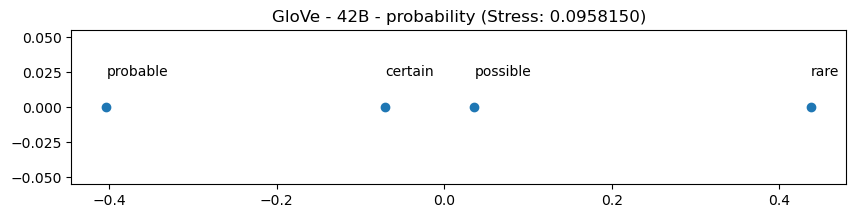

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


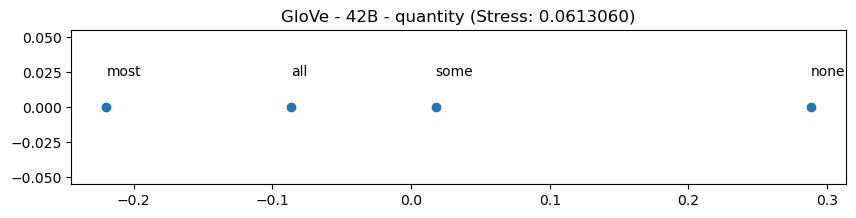

In [10]:
# Choosing the 3rd option - 
# Compare the output from Glove models of differing sizes. 
# Do larger models do a better job of getting the word order right? 
# Are they more similar to humans?

# Code for the glove.42B.300d.txt
from scipy.spatial.distance import cosine

glove_distance_matrix_by_category = {}

with open("files/glove/glove.42B.300d.txt", encoding='utf-8') as f:
    for line in f:
        word, rest = line.split(" ", 1)
        if word in words_of_interest:
            word_vectors[word] = np.array(rest.split()).astype("float")


for category, word in words_by_category.items():
    num_words = len(word)
    distance_matrix = np.zeros((num_words, num_words))

    for i in range(num_words):
        for j in range(i + 1, num_words):
            distance = cosine(word_vectors[word[i]], word_vectors[word[j]])
            distance_matrix[i, j] = distance_matrix[j, i] = distance
    
    glove_distance_matrix_by_category[category] = distance_matrix

handle_dict(glove_distance_matrix_by_category, "GloVe - 42B")


/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


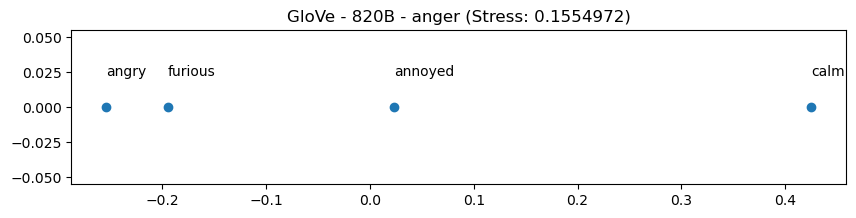

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


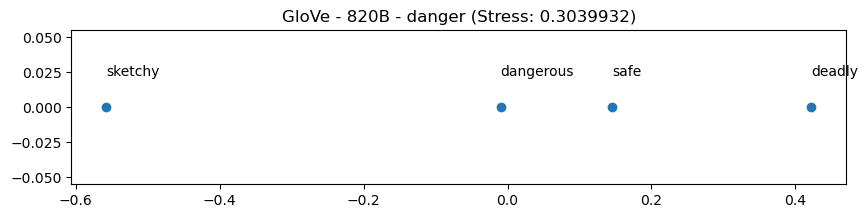

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


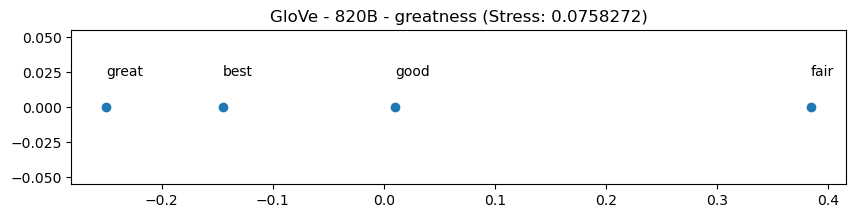

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


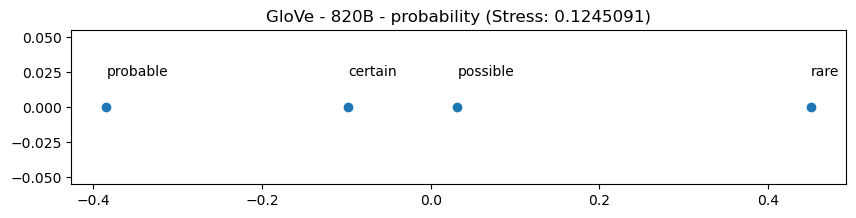

/Users/pennywise97/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


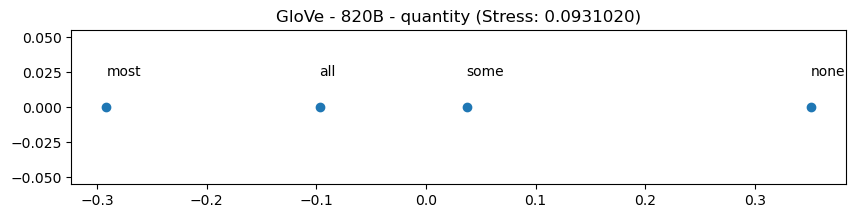

In [11]:
# Code for the glove.840B.300d.txt
from scipy.spatial.distance import cosine

glove_distance_matrix_by_category = {}

with open("files/glove/glove.840B.300d.txt", encoding='utf-8') as f:
    for line in f:
        word, rest = line.split(" ", 1)
        if word in words_of_interest:
            word_vectors[word] = np.array(rest.split()).astype("float")


for category, word in words_by_category.items():
    num_words = len(word)
    distance_matrix = np.zeros((num_words, num_words))

    for i in range(num_words):
        for j in range(i + 1, num_words):
            distance = cosine(word_vectors[word[i]], word_vectors[word[j]])
            distance_matrix[i, j] = distance_matrix[j, i] = distance
    
    glove_distance_matrix_by_category[category] = distance_matrix

handle_dict(glove_distance_matrix_by_category, "GloVe - 820B")

### Comparisons between Glove 6B, 42B, and 820B datasets and if they come any closer to Human :
Surprisingly, the larger models do not significantly improve in the distance parameter between the values and the order of the words remains the same. One thing to note is that the stress levels significantly reduce as the models go bigger and bigger. For example, the stress levels for Anger word embedding for GloVe 6B model is 0.26 and the one for GloVe 840B model is 0.15 (this is for abstract embeddings). For stringent embeddings like quantity, we can see the stress level reduces from 6B model (0.157) to 42B model (0.06) and to 840B model (0.093). Another thing to note here is that in terms of stress levels, 42B models performs better than 840B models in all embeddings except Anger. Last thing to note here is that, as compared to human data, we can see these large models are still a little far off but in one particular embedding, we can see that they seem to match human data closely - greatness. In GloVe 6B model, we can see big distance between great and best, human data shows great and best closer by. The larger models 42B and 840B have the distance between great and best almost as much as the human data. So, in conclusion, larger models shows some improvements and possibility of emulating human data but they are not quiet there yet.

## References

* Pennington, J., Socher, R., & Manning, C.D. (2014). *GloVe: Global
  Vectors for Word Representation*.
  
* Varma, S., Sanford, E. M., Marupudi, V., Shaffer, O., & Lea, R. B. (2024). Recruitment of magnitude representations to understand graded words. Cognitive Psychology, 153, 101673.

## Submission guidelines

Please submit your Jupyter notebook to Canvas with a text file / .docx / .odt file with your written answers.